# Analysis & Implimentation of the Perceptron Algorithm: Capabilities & Limits

*THIS IS A ROUGH DRAFT* | *STILL IN PROGRESS*

The Rosenblatt Perceptron Algorithm is an algorithm for supervised learning of a binary classifier. It trains a linear classifier that makes a prediction $ h(x ; \theta, \theta_{0}) $ given a point $x$ and weights $\theta$ and $\theta_0$. Specifically, this prediction is:

<br />

$$ \begin{equation}
h\left(x ; \theta, \theta_{0}\right)=\operatorname{sign}\left(\theta^{\top} x+\theta_{0}\right)=\left\{\begin{array}{ll}
+1 & \text { if } \theta^{\top} x+\theta_{0}>0 \\
-1 & \text { otherwise }
\end{array}\right.
\end{equation} $$

<br />


These weights, $\theta$ and $\theta_{0}$, define a hyper-plane. This hyper-plane then acts as our decision boundry. Think of a hyper-plane as a line in 2D, a plane in 3D, and so on. Technically, this hyper-plane takes the form $\theta_0 + \theta_1x_1 + ... + \theta_dx_d = 0$. This means the vector $<\theta_1, ... , \theta_d>$ is a normal to the hyper-plane pointing in the positive direction. To add a graphical explanation of this: 

<br />

<center><img src="perceptron_example.png" width="600" height="400"></center>

<br />

Now I have explained the notation and given some intuition about how the Perceptron Algorithm makes hypothesis and how the hyper-plane is defined. The Perceptron Algorithm is as follows: 

<img src="perceptron_algorithm.png" width="300" height="200">

One important note about the Perceptron Algorithm is that if a dataset is linear seperable, then the Perceptron Algorithm will ALWAYS find a $\theta$ and $\theta_0$ seperating the dataset.



In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Defining Data Using SKLearn Blobs

In [3]:
# How many data points of dx1 dimensions to train algorithm on
sample_size = 100

X, y = make_blobs(n_samples = sample_size, centers = 2, random_state = 1)
X = np.transpose(np.array(X))
y = np.array(y)

# By default sklearn blobs are classified with {0, 1} but we want {-1, 1} for *already explained reasons*
y[y == 0] = -1


### The Perceptron Algorithm (fix temp var to shorten)

In [4]:
# Perceptron Algorithm
def perceptron(t, D, y):
    th0s = np.array([0])
    ths = np.array([[0], [0]])

    for t in range(t):
        for i in range(sample_size):
            if (y[i] * (np.dot(D[:, i], ths) + th0s) <= 0):
                ths = ths + np.transpose(np.expand_dims((y[i]) * D[:, i], axis = 0)) 
                th0s = th0s + y[i]

    return ths, th0s

# Calling Perceptron Algorithm
theta1, theta0 = perceptron(10000, X, y)


### Plotting Points & Line (divide 0 problem fix)

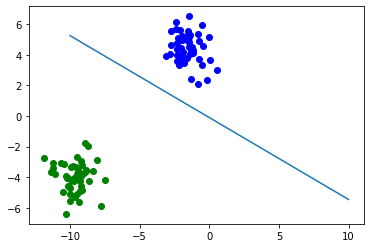

In [6]:
# Green for +1 and Blue for -1
for i in range(sample_size):
    if (y[i] == 1):
        plt.scatter(X[0][i], X[1][i], color="green") 
    else:
        plt.scatter(X[0][i], X[1][i], color="blue")

        
# *CHANGE NAMES* 
x = np.linspace(-10, 10, 10)
hyperplane = ((-1)*(theta1[0][0] / theta1[1][0]) * x) - (theta0[0]/theta1[1][0])

plt.plot(x, hyperplane, '-')

plt.show()
